**Importing the libraries**

In [1]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import json
import glob
from sklearn.model_selection import GridSearchCV
import scipy.signal
import pandas as pd
from scipy.signal import find_peaks
import numpy as np
import shap
import lime
import lime.lime_tabular

In [90]:
path = 'D:\PIP\Data\Processed Data'

**misclassified_final_df1 is the dataframe of the misclassified events for model 1**

In [5]:
misclassified_final_df1 = pd.read_csv('misclassified_final_df1.csv', index_col = 0)

**misclassified_el_df is the dataframe of the misclassified events for model 2**

misclassified_el_df = pd.read_csv('misclassified_el_df.csv' , index_col = 0)

In [86]:
misclassified_final_df1.head()

Event_ID   mean_of_sum  \
11092  RXZlbnRJbmZvcm1hdGlvbjpkYTY2NWRhZC1iOTUxLTRiZD...  14975.203202   
3198   RXZlbnRJbmZvcm1hdGlvbjo3ZjQzMzg2Ny02MjQwLTQyMm...  13683.039835   
12965  RXZlbnRJbmZvcm1hdGlvbjpmZTA2N2I4ZS05Yzg2LTRkNm...  15011.863756   
2673   RXZlbnRJbmZvcm1hdGlvbjo3NDE3ZWVkMS1lNWY1LTQ1MW...  15487.125000   
3473   RXZlbnRJbmZvcm1hdGlvbjo4NDk0ZGE3NS1mYjE0LTRhN2...  13443.159722   

       min_of_sum  max_of_sum  median_of_sum  variance_of_sum  activity_time  \
11092        9652       15719        15171.5    588727.560384      20.274931   
3198         9636       14455        13791.0    411175.666912      18.175000   
12965       11344       15612        15026.0     47403.023823     274.849932   
2673        10007       16500        15581.0    433154.841497      18.374937   
3473         8404       14543        13623.5    773265.129227      14.374937   

       std_of_sum    rms_of_sum  crest_factor  ...  PSD_10_to_15Hz_min  \
11092  767.285840  14994.822889      1.048295  ...           15.909405   
3198   641.229808  13698.035990      1.055261  ...            0.326397   
12965  217.722355  15013.442382      1.039868  ...            0.047071   
2673   658.145000  15501.084061      1.064442  ...          195.978474   
3473   879.354951  13471.839740      1.079511  ...            1.814225   

       PSD_10_to_15Hz_median  PSD_15_to_20Hz_max  PSD_15_to_20Hz_min  \
11092             298.812620          618.175327           63.312075   
3198              523.633953         1090.300268           31.498570   
12965              94.415007          452.993117            0.019741   
2673              751.647214         1142.650498          200.574049   
3473             1091.663433         3260.181274           83.097677   

       PSD_15_to_20Hz_median            Label  Cat_Name  Label E/NE  \
11092             261.398627        urination     Monte           1   
3198              412.965192        urination  Sparkler           1   
12965              48.710718  non_elimination      Abby           0   
2673              498.786391        urination     Monte           1   
3473              749.661742        urination     Negan           1   

       Range_of_sum  y_pred2  
11092          6067        0  
3198           4819        0  
12965          4268        1  
2673           6493        0  
3473           6139        0  

[5 rows x 28 columns]

In [87]:
misclassified_el_df.head()

Event_ID   mean_of_sum  \
6697   RXZlbnRJbmZvcm1hdGlvbjoyNDg0Y2YzNS03MWNlLTQwNT...  13049.903333   
6962   RXZlbnRJbmZvcm1hdGlvbjoyOWQxNWVlZS00MTkzLTRmYm...  12464.954600   
10463  RXZlbnRJbmZvcm1hdGlvbjpjZWJjYTNiMC05MGZlLTQzOT...  17898.692356   
6182   RXZlbnRJbmZvcm1hdGlvbjoxYTRjNjU0OS0zM2JhLTQzZD...  11217.774837   
4789   RXZlbnRJbmZvcm1hdGlvbjo5ZjE5ZTlmYi1lMzVlLTRiYT...  13885.567144   

       min_of_sum  max_of_sum  median_of_sum  variance_of_sum  activity_time  \
6697         8222       14957        13226.0    435104.586848     178.933131   
6962         8211       13339        12477.0     47729.685546     248.324938   
10463       13573       19389        18105.0    480479.077560      40.199982   
6182         7368       12643        11225.0     37042.996274     180.399937   
4789         8165       14990        13900.0     60315.246481     132.524931   

       std_of_sum    rms_of_sum  crest_factor  ...  PSD_10_to_15Hz_min  \
6697   659.624580  13066.561184      1.144678  ...            0.311676   
6962   218.471246  12466.868816      1.069956  ...            0.064011   
10463  693.165981  17912.101175      1.082453  ...            1.285183   
6182   192.465572  11219.425572      1.126885  ...            0.157179   
4789   245.591625  13887.738433      1.079369  ...            0.493841   

       PSD_10_to_15Hz_median  PSD_15_to_20Hz_max  PSD_15_to_20Hz_min  \
6697              157.452769          825.716822            0.093430   
6962              147.124804         1231.278911            0.023980   
10463             206.617726         1451.426726            0.333017   
6182               97.041300          645.188450            0.005997   
4789              203.817703          674.926789            0.155488   

       PSD_15_to_20Hz_median  Label     Cat_Name  Label E/NE  Range_of_sum  \
6697               52.375771      1    Betty Lou           1          6735   
6962               58.302870      1     Sparkler           1          5128   
10463             314.633110      0        Frank           1          5816   
6182               77.380806      1       Violet           1          5275   
4789              112.258958      1  Corned Beef           1          6825   

       y_pred  
6697        0  
6962        0  
10463       1  
6182        0  
4789        0  

[5 rows x 28 columns]

**Plotting box-plots for different features in the misclassified dataframe**

In [88]:
## Label E/NE is the actual value and y_pred2 is the column containing the value predicted by the model#

<AxesSubplot:xlabel='y_pred2', ylabel='activity_time'>

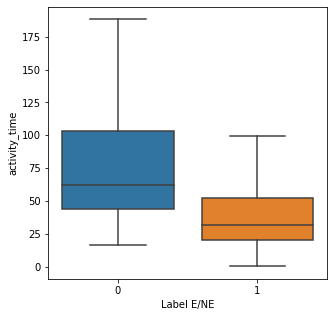

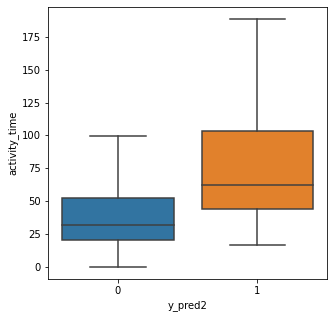

In [71]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['Label E/NE'], y = misclassified_final_df1['activity_time'], showfliers=False)
#---------------------------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['y_pred2'], y = misclassified_final_df1['activity_time'], showfliers=False)

<AxesSubplot:xlabel='y_pred2', ylabel='variance_of_sum'>

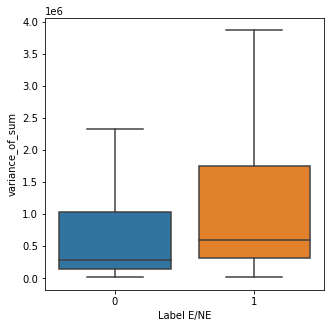

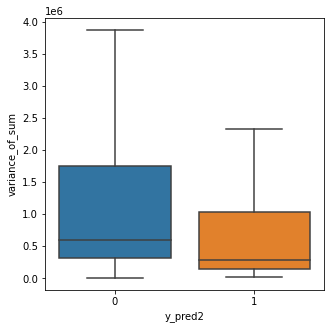

In [72]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['Label E/NE'], y = misclassified_final_df1['variance_of_sum'], showfliers=False)
#-----------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['y_pred2'], y = misclassified_final_df1['variance_of_sum'], showfliers=False)

<AxesSubplot:xlabel='y_pred2', ylabel='PSD_10_to_15Hz_median'>

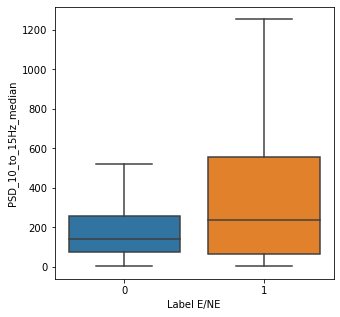

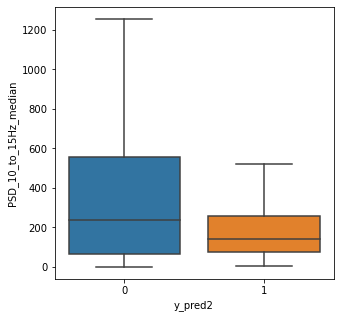

In [73]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['Label E/NE'], y = misclassified_final_df1['PSD_10_to_15Hz_median'], showfliers=False)
#---------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['y_pred2'], y = misclassified_final_df1['PSD_10_to_15Hz_median'], showfliers=False)

<AxesSubplot:xlabel='y_pred2', ylabel='PSD_10_to_15Hz_max'>

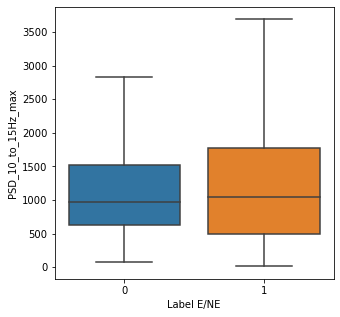

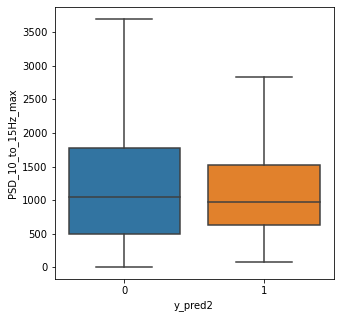

In [74]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['Label E/NE'], y = misclassified_final_df1['PSD_10_to_15Hz_max'], showfliers=False)
#-----------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['y_pred2'], y = misclassified_final_df1['PSD_10_to_15Hz_max'], showfliers=False)

<AxesSubplot:xlabel='y_pred2', ylabel='no_of_peaks'>

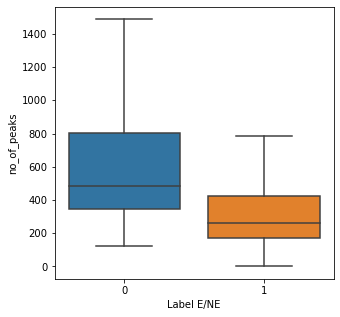

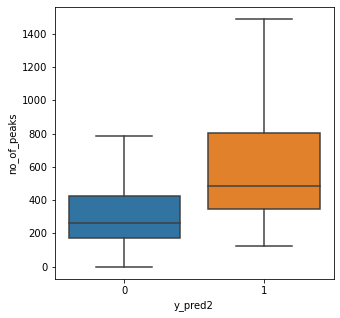

In [75]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['Label E/NE'], y = misclassified_final_df1['no_of_peaks'], showfliers=False)
#-------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['y_pred2'], y = misclassified_final_df1['no_of_peaks'], showfliers=False)

<AxesSubplot:xlabel='y_pred2', ylabel='rms_of_sum'>

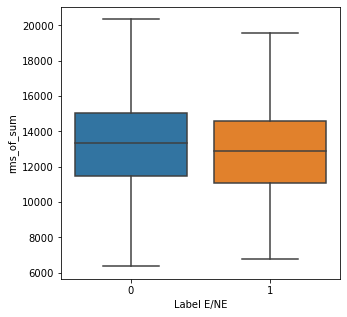

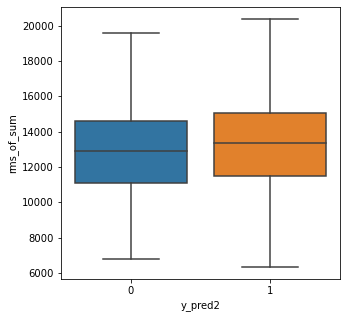

In [76]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['Label E/NE'], y = misclassified_final_df1['rms_of_sum'], showfliers=False)
#-----------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['y_pred2'], y = misclassified_final_df1['rms_of_sum'], showfliers=False)

<AxesSubplot:xlabel='y_pred2', ylabel='std_of_sum'>

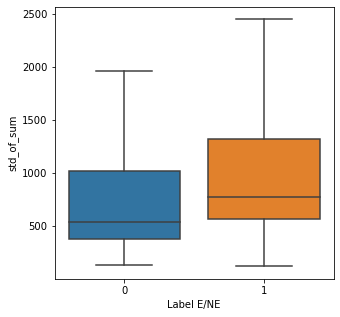

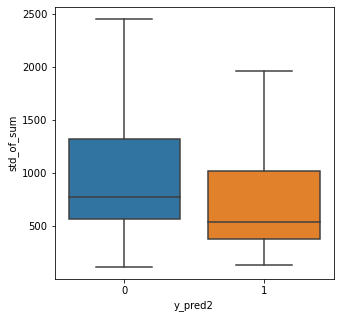

In [77]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['Label E/NE'], y = misclassified_final_df1['std_of_sum'], showfliers=False)
#-----------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['y_pred2'], y = misclassified_final_df1['std_of_sum'], showfliers=False)

<AxesSubplot:xlabel='y_pred2', ylabel='PSD_0_to_5Hz_max'>

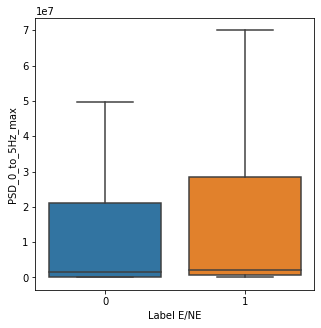

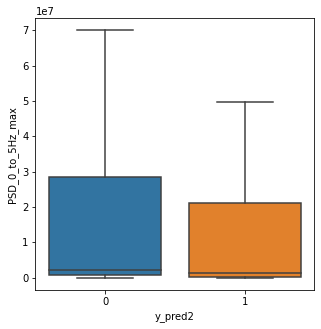

In [78]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['Label E/NE'], y = misclassified_final_df1['PSD_0_to_5Hz_max'], showfliers=False)
#--------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['y_pred2'], y = misclassified_final_df1['PSD_0_to_5Hz_max'], showfliers=False)

<AxesSubplot:xlabel='y_pred2', ylabel='PSD_0_to_5Hz_min'>

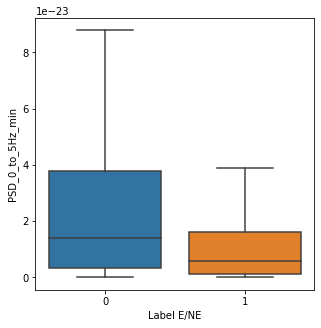

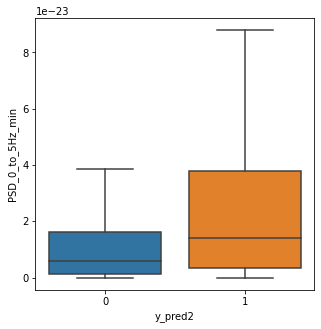

In [79]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['Label E/NE'], y = misclassified_final_df1['PSD_0_to_5Hz_min'], showfliers=False)
#-----------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['y_pred2'], y = misclassified_final_df1['PSD_0_to_5Hz_min'], showfliers=False)

<AxesSubplot:xlabel='y_pred2', ylabel='PSD_0_to_5Hz_median'>

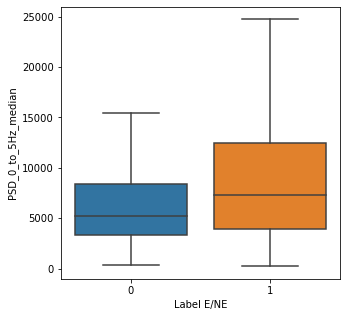

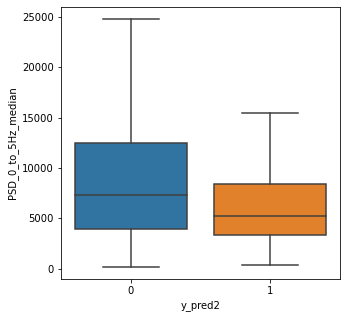

In [80]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['Label E/NE'], y = misclassified_final_df1['PSD_0_to_5Hz_median'], showfliers=False)
#------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['y_pred2'], y = misclassified_final_df1['PSD_0_to_5Hz_median'], showfliers=False)

<AxesSubplot:xlabel='y_pred2', ylabel='PSD_5_to_10Hz_max'>

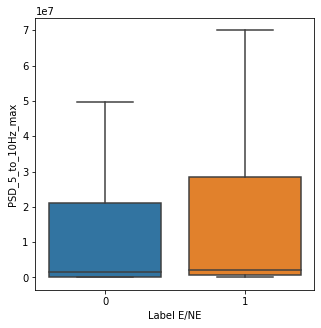

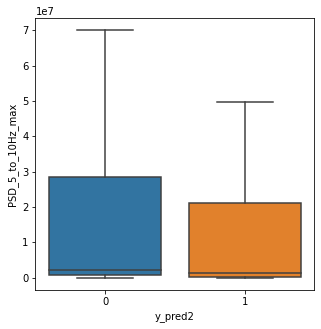

In [36]:

fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['Label E/NE'], y = misclassified_final_df1['PSD_5_to_10Hz_max'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['y_pred2'], y = misclassified_final_df1['PSD_5_to_10Hz_max'], showfliers=False)

<AxesSubplot:xlabel='y_pred2', ylabel='PSD_5_to_10Hz_min'>

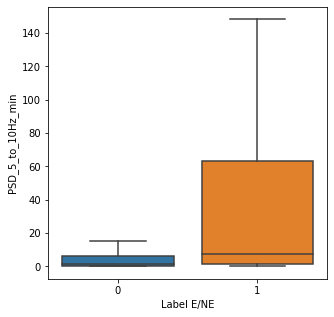

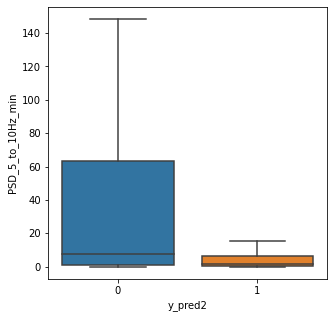

In [34]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['Label E/NE'], y = misclassified_final_df1['PSD_5_to_10Hz_min'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['y_pred2'], y = misclassified_final_df1['PSD_5_to_10Hz_min'], showfliers=False)

<AxesSubplot:xlabel='y_pred2', ylabel='PSD_5_to_10Hz_median'>

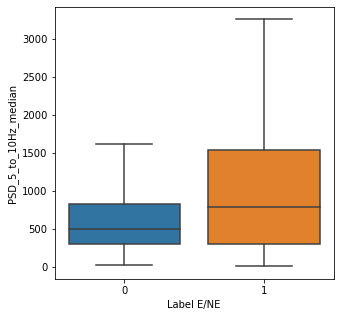

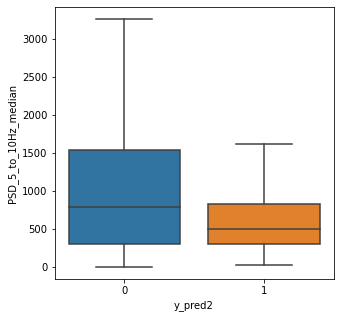

In [35]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['Label E/NE'], y = misclassified_final_df1['PSD_5_to_10Hz_median'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['y_pred2'], y = misclassified_final_df1['PSD_5_to_10Hz_median'], showfliers=False)

<AxesSubplot:xlabel='y_pred2', ylabel='PSD_15_to_20Hz_median'>

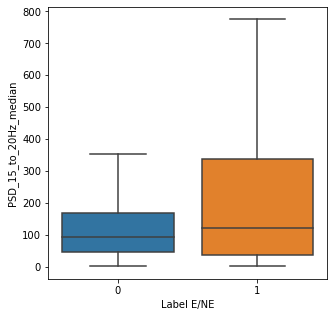

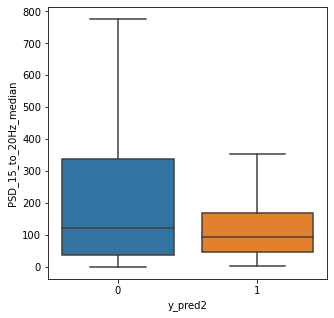

In [38]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['Label E/NE'], y = misclassified_final_df1['PSD_15_to_20Hz_median'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['y_pred2'], y = misclassified_final_df1['PSD_15_to_20Hz_median'], showfliers=False)

<AxesSubplot:xlabel='y_pred2', ylabel='PSD_15_to_20Hz_min'>

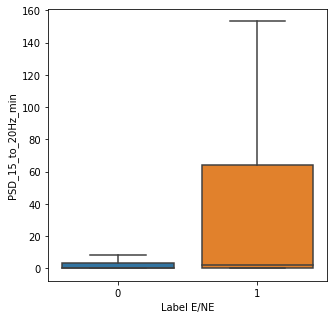

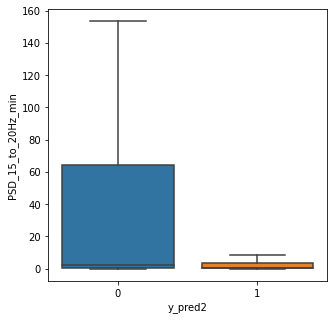

In [39]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['Label E/NE'], y = misclassified_final_df1['PSD_15_to_20Hz_min'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['y_pred2'], y = misclassified_final_df1['PSD_15_to_20Hz_min'], showfliers=False)

<AxesSubplot:xlabel='y_pred2', ylabel='PSD_10_to_15Hz_median'>

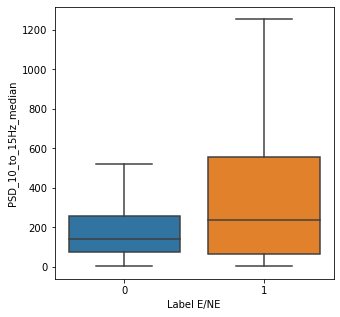

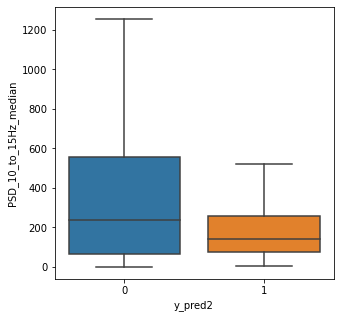

In [41]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['Label E/NE'], y = misclassified_final_df1['PSD_10_to_15Hz_median'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['y_pred2'], y = misclassified_final_df1['PSD_10_to_15Hz_median'], showfliers=False)

<AxesSubplot:xlabel='y_pred2', ylabel='PSD_10_to_15Hz_min'>

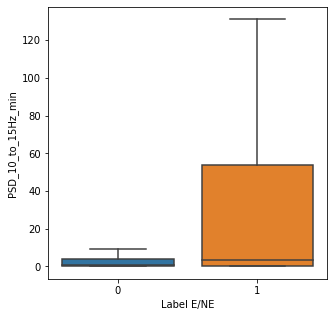

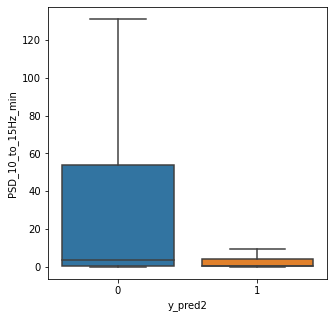

In [42]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['Label E/NE'], y = misclassified_final_df1['PSD_10_to_15Hz_min'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_final_df1['y_pred2'], y = misclassified_final_df1['PSD_10_to_15Hz_min'], showfliers=False)

# **Misclassification Analysis of second model dataframe** 

In [89]:
## Label is the actual value given(i.e urination or defecation) and y_pred is the value predicted by the model#

<AxesSubplot:xlabel='y_pred', ylabel='max_of_sum'>

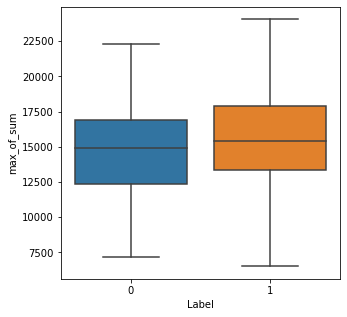

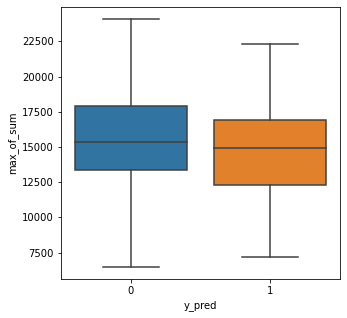

In [47]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['Label'], y = misclassified_el_df['max_of_sum'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['y_pred'], y = misclassified_el_df['max_of_sum'], showfliers=False)

<AxesSubplot:xlabel='y_pred', ylabel='variance_of_sum'>

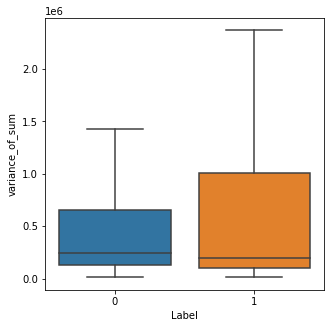

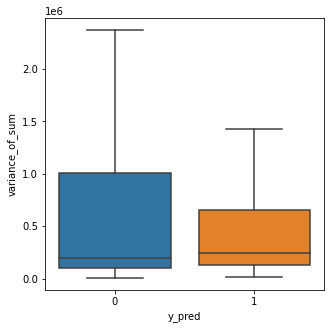

In [49]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['Label'], y = misclassified_el_df['variance_of_sum'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['y_pred'], y = misclassified_el_df['variance_of_sum'], showfliers=False)

<AxesSubplot:xlabel='y_pred', ylabel='activity_time'>

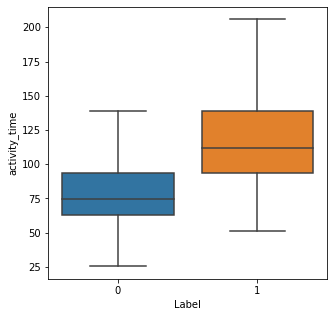

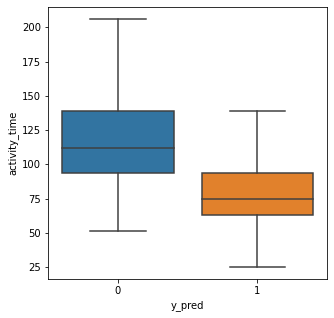

In [50]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['Label'], y = misclassified_el_df['activity_time'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['y_pred'], y = misclassified_el_df['activity_time'], showfliers=False)

<AxesSubplot:xlabel='y_pred', ylabel='std_of_sum'>

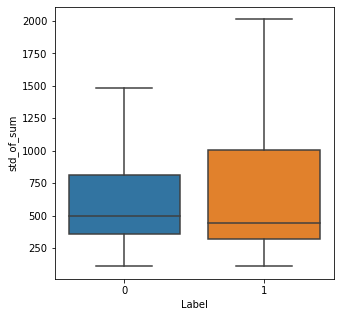

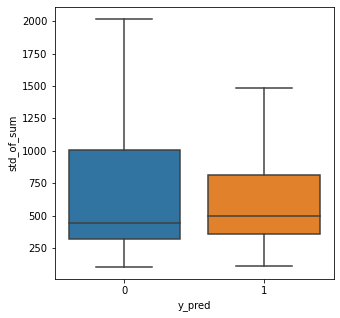

In [51]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['Label'], y = misclassified_el_df['std_of_sum'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['y_pred'], y = misclassified_el_df['std_of_sum'], showfliers=False)

<AxesSubplot:xlabel='y_pred', ylabel='crest_factor'>

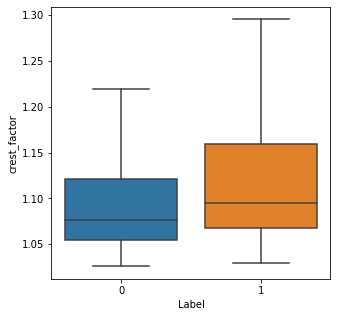

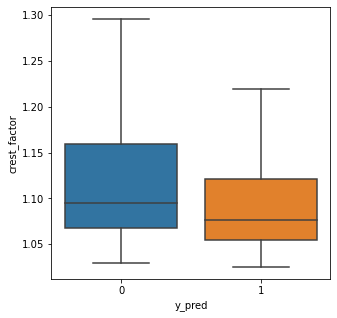

In [53]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['Label'], y = misclassified_el_df['crest_factor'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['y_pred'], y = misclassified_el_df['crest_factor'], showfliers=False)

<AxesSubplot:xlabel='y_pred', ylabel='no_of_peaks'>

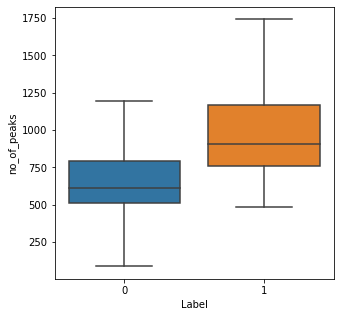

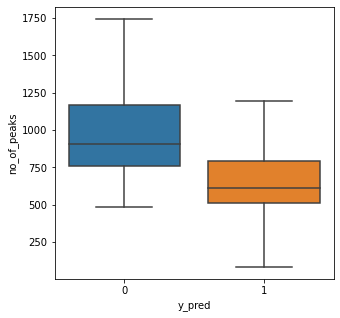

In [54]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['Label'], y = misclassified_el_df['no_of_peaks'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['y_pred'], y = misclassified_el_df['no_of_peaks'], showfliers=False)

<AxesSubplot:xlabel='y_pred', ylabel='PSD_0_to_5Hz_max'>

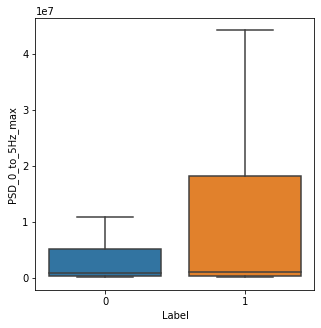

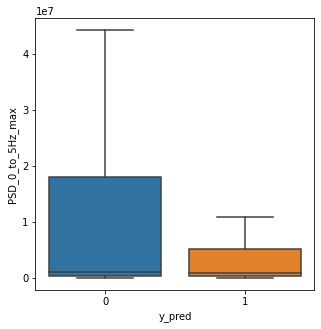

In [55]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['Label'], y = misclassified_el_df['PSD_0_to_5Hz_max'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['y_pred'], y = misclassified_el_df['PSD_0_to_5Hz_max'], showfliers=False)

<AxesSubplot:xlabel='y_pred', ylabel='PSD_0_to_5Hz_min'>

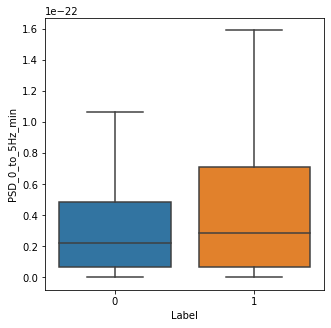

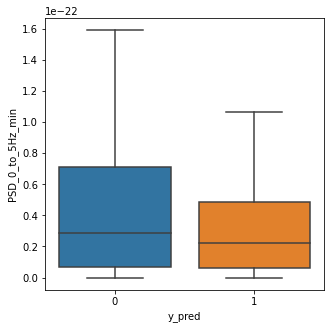

In [56]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['Label'], y = misclassified_el_df['PSD_0_to_5Hz_min'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['y_pred'], y = misclassified_el_df['PSD_0_to_5Hz_min'], showfliers=False)

<AxesSubplot:xlabel='y_pred', ylabel='PSD_5_to_10Hz_max'>

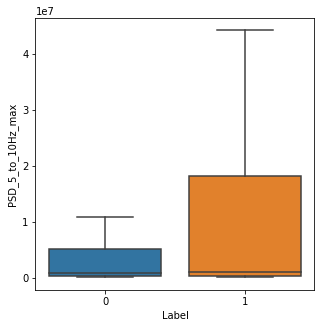

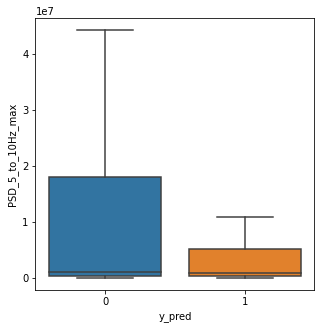

In [59]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['Label'], y = misclassified_el_df['PSD_5_to_10Hz_max'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['y_pred'], y = misclassified_el_df['PSD_5_to_10Hz_max'], showfliers=False)

<AxesSubplot:xlabel='y_pred', ylabel='PSD_5_to_10Hz_min'>

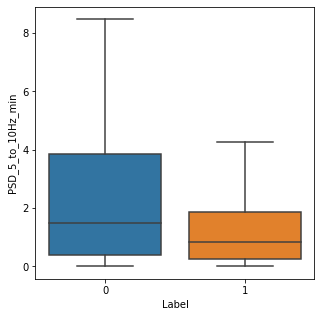

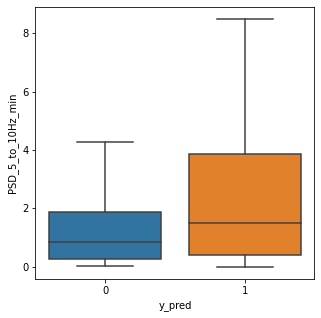

In [60]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['Label'], y = misclassified_el_df['PSD_5_to_10Hz_min'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['y_pred'], y = misclassified_el_df['PSD_5_to_10Hz_min'], showfliers=False)

<AxesSubplot:xlabel='y_pred', ylabel='PSD_10_to_15Hz_min'>

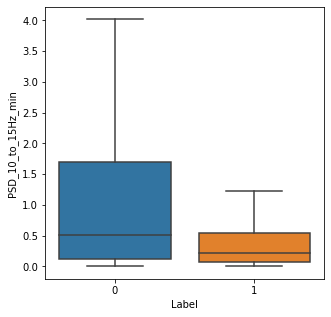

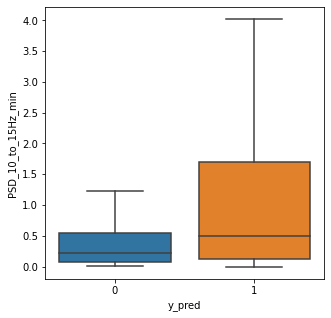

In [63]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['Label'], y = misclassified_el_df['PSD_10_to_15Hz_min'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['y_pred'], y = misclassified_el_df['PSD_10_to_15Hz_min'], showfliers=False)

<AxesSubplot:xlabel='y_pred', ylabel='PSD_10_to_15Hz_median'>

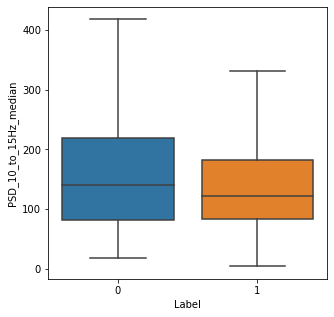

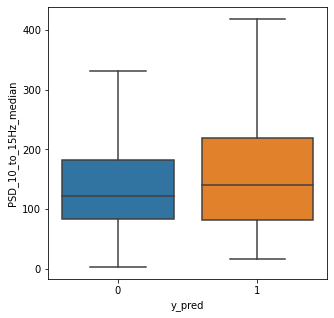

In [64]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['Label'], y = misclassified_el_df['PSD_10_to_15Hz_median'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['y_pred'], y = misclassified_el_df['PSD_10_to_15Hz_median'], showfliers=False)

<AxesSubplot:xlabel='y_pred', ylabel='PSD_15_to_20Hz_min'>

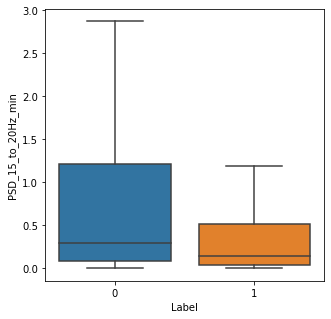

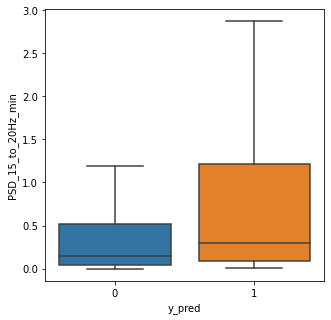

In [66]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['Label'], y = misclassified_el_df['PSD_15_to_20Hz_min'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['y_pred'], y = misclassified_el_df['PSD_15_to_20Hz_min'], showfliers=False)

<AxesSubplot:xlabel='y_pred', ylabel='Range_of_sum'>

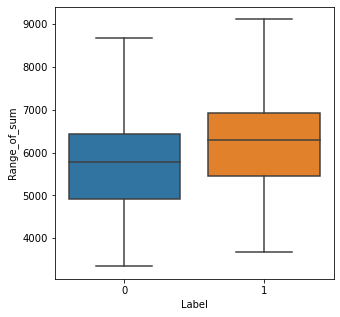

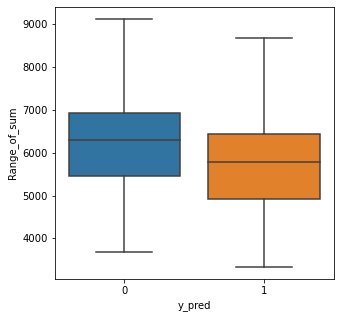

In [68]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['Label'], y = misclassified_el_df['Range_of_sum'], showfliers=False)
#--------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x= misclassified_el_df['y_pred'], y = misclassified_el_df['Range_of_sum'], showfliers=False)